In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
    .appName("Create Hive Table from CSV") \
    .config("spark.sql.warehouse.dir", "/user/hive/warehouse") \
    .enableHiveSupport() \
    .getOrCreate()

In [ ]:
csv_file_path = "/content/BostonHousing.csv"

In [ ]:
database_name = "default"
table_name = "bostonhousing"

In [ ]:
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

In [ ]:
df.write.mode("overwrite").saveAsTable(f"{database_name}.{table_name}")

In [ ]:
print(f"Table '{table_name}' successfully created in database '{database_name}'.")

Table 'bostonhousing' successfully created in database 'default'.


In [ ]:
df_task1a = spark.sql(f"SELECT * FROM {database_name}.{table_name} LIMIT 5")
print("Task 1a: First 5 rows of the dataset")
df_task1a.show()

Task 1a: First 5 rows of the dataset
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [ ]:
total_records = spark.sql(f"SELECT COUNT(*) AS total_records FROM {database_name}.{table_name}").collect()[0]["total_records"]
print("\nTask 1b: Total number of records in the dataset")
print(total_records)


Task 1b: Total number of records in the dataset
506


In [ ]:
df_task2a = spark.sql(f"""
    SELECT
      AVG(medv) AS mean_medv,
      STDDEV(medv) AS std_dev_medv,
      MIN(medv) AS min_medv,
      MAX(medv) AS max_medv
    FROM {database_name}.{table_name}
""")
print("\nTask 2a: Descriptive statistics for 'medv' column")
df_task2a.show()


Task 2a: Descriptive statistics for 'medv' column
+------------------+-----------------+--------+--------+
|         mean_medv|     std_dev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+



In [ ]:
avg_rm = spark.sql(f"SELECT AVG(rm) AS avg_rm FROM {database_name}.{table_name}").collect()[0]["avg_rm"]
print("\nTask 2b: Mean of 'rm' column")
print(avg_rm)


Task 2b: Mean of 'rm' column
6.284634387351787


In [ ]:
df_task3a = spark.sql(f"""
    SELECT *
    FROM {database_name}.{table_name}
    WHERE crim = (SELECT MAX(crim) FROM {database_name}.{table_name})
""")
print("Task 3a: Property with the highest crime rate")
df_task3a.show()

Task 3a: Property with the highest crime rate
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [ ]:
df_task3b = spark.sql(f"""
    SELECT *
    FROM {database_name}.{table_name}
    WHERE medv = (SELECT MIN(medv) FROM {database_name}.{table_name})
""")
print("Task 3b: Property with the lowest median home value")
df_task3b.show()

Task 3b: Property with the lowest median home value
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



In [ ]:
import matplotlib.pyplot as plt

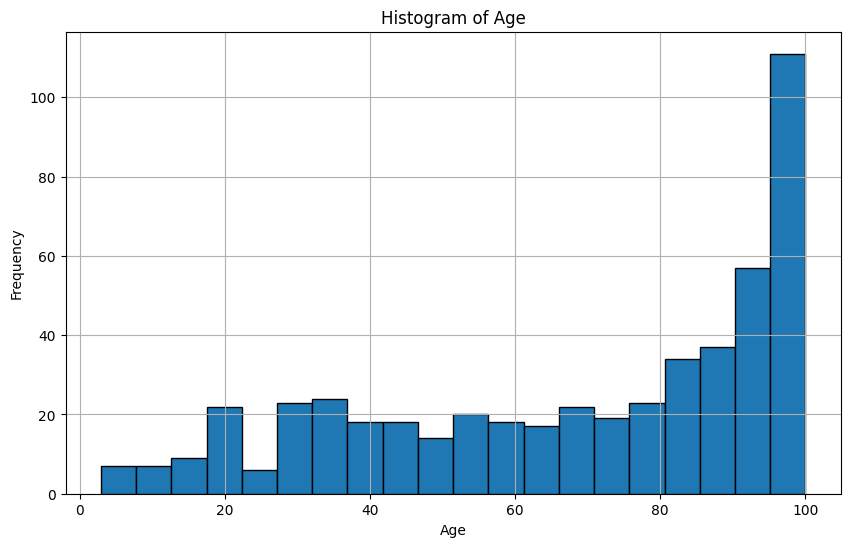

In [ ]:
df_age_histogram = spark.sql(f"""
    SELECT age
    FROM {database_name}.{table_name}
""")
age_data = df_age_histogram.toPandas()

plt.figure(figsize=(10, 6))
plt.hist(age_data['age'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
num_chas_1 = spark.sql(f"""
    SELECT COUNT(*) AS num_chas_1
    FROM {database_name}.{table_name}
    WHERE chas = 1
""").collect()[0]["num_chas_1"]

total_properties = total_records
percentage_chas_1 = (num_chas_1 / total_properties) * 100
print(f"Task 4b: Percentage of properties with 'chas' value of 1: {percentage_chas_1:.2f}%")

Task 4b: Percentage of properties with 'chas' value of 1: 6.92%


In [ ]:
correlation_rm_medv = df.stat.corr("rm", "medv")
print(f"Task 5a: Correlation coefficient between 'rm' and 'medv': {correlation_rm_medv:.2f}")

print("The correlation coefficient suggests a moderately strong positive relationship between the average number of rooms (rm) and median home value (medv). As the number of rooms increases, the median home value tends to increase as well.")

Task 5a: Correlation coefficient between 'rm' and 'medv': 0.70
The correlation coefficient suggests a moderately strong positive relationship between the average number of rooms (rm) and median home value (medv). As the number of rooms increases, the median home value tends to increase as well.


In [ ]:
correlation_ptratio_nox = df.stat.corr("ptratio", "nox")
print(f"Task 5b: Correlation coefficient between 'ptratio' and 'nox': {correlation_ptratio_nox:.2f}")

if correlation_ptratio_nox > 0:
    print("There is a positive correlation between pupil-teacher ratio (ptratio) and nitrogen oxide concentration (nox). Higher pupil-teacher ratios tend to be associated with higher nitrogen oxide concentrations.")
elif correlation_ptratio_nox < 0:
    print("There is a negative correlation between pupil-teacher ratio (ptratio) and nitrogen oxide concentration (nox). Higher pupil-teacher ratios tend to be associated with lower nitrogen oxide concentrations.")
else:
    print("There is no significant correlation between pupil-teacher ratio (ptratio) and nitrogen oxide concentration (nox).")

Task 5b: Correlation coefficient between 'ptratio' and 'nox': 0.19
There is a positive correlation between pupil-teacher ratio (ptratio) and nitrogen oxide concentration (nox). Higher pupil-teacher ratios tend to be associated with higher nitrogen oxide concentrations.


In [ ]:
top_neighborhoods = spark.sql(f"""
    SELECT b AS neighborhood, AVG(medv) AS avg_medv
    FROM {database_name}.{table_name}
    GROUP BY b
    ORDER BY avg_medv DESC
    LIMIT 5
""")
print("Task 6a: Top 5 neighborhoods with highest median home values")
top_neighborhoods.show()


Task 6a: Top 5 neighborhoods with highest median home values
+------------+--------+
|neighborhood|avg_medv|
+------------+--------+
|      374.43|    50.0|
|      390.55|    50.0|
|      375.52|    50.0|
|      392.05|    50.0|
|      347.88|    50.0|
+------------+--------+



In [ ]:
avg_age_chas_1 = spark.sql(f"""
    SELECT AVG(age) AS avg_age_chas_1
    FROM {database_name}.{table_name}
    WHERE chas = 1
""").collect()[0]["avg_age_chas_1"]

avg_age_chas_0 = spark.sql(f"""
    SELECT AVG(age) AS avg_age_chas_0
    FROM {database_name}.{table_name}
    WHERE chas = 0
""").collect()[0]["avg_age_chas_0"]

print(f"Task 6b: Average property age for neighborhoods with 'chas' value of 1: {avg_age_chas_1:.2f}")
print(f"       Average property age for neighborhoods with 'chas' value of 0: {avg_age_chas_0:.2f}")

Task 6b: Average property age for neighborhoods with 'chas' value of 1: 77.50
       Average property age for neighborhoods with 'chas' value of 0: 67.91


In [ ]:
spark.sql(f"""
    CREATE OR REPLACE VIEW property_age_view AS
    SELECT age, medv
    FROM {database_name}.{table_name}
""")
print("Task 7a: Hive view 'property_age_view' created successfully")

Task 7a: Hive view 'property_age_view' created successfully


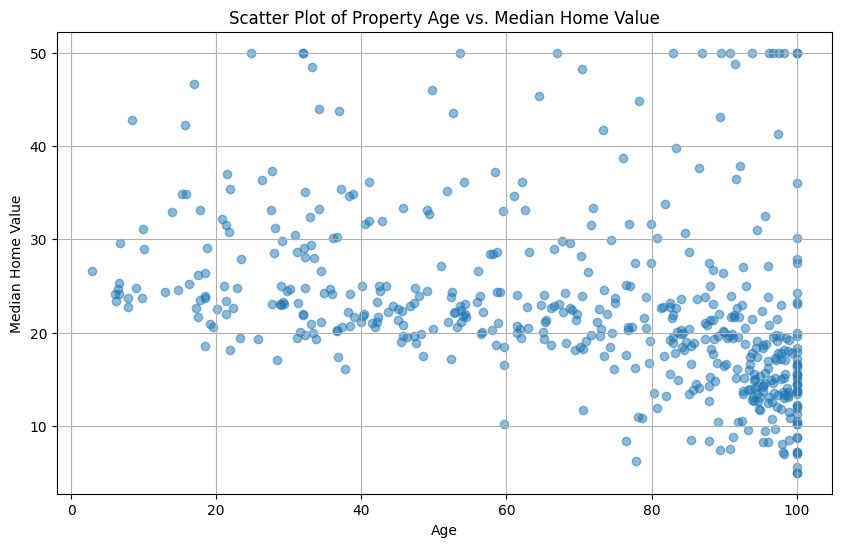

In [ ]:
age_medv_data = spark.sql(f"SELECT age, medv FROM {database_name}.{table_name}").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(age_medv_data['age'], age_medv_data['medv'], alpha=0.5)
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.xlabel('Age')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

In [ ]:
df_outliers_crim = spark.sql(f"""
    SELECT *
    FROM {database_name}.{table_name}
    WHERE crim > 10
""")
print("Task 8a: Properties with 'crim' value greater than 10")
df_outliers_crim.show()

Task 8a: Properties with 'crim' value greater than 10
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   

In [ ]:
print("Task 8b: Significance of detecting outliers in data analysis")
print("Outliers can significantly affect statistical analyses and machine learning models. They can skew results, introduce bias, and impact model performance. Detecting and handling outliers is crucial to ensure the reliability and accuracy of data-driven insights and predictions.")

Task 8b: Significance of detecting outliers in data analysis
Outliers can significantly affect statistical analyses and machine learning models. They can skew results, introduce bias, and impact model performance. Detecting and handling outliers is crucial to ensure the reliability and accuracy of data-driven insights and predictions.


In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

vector_assembler = VectorAssembler(inputCols=["rm"], outputCol="features")
df_vector = vector_assembler.transform(df)

pearson_corr = Correlation.corr(df_vector, "features").head()[0].toArray()[0, 0]
print(f"Task 9a: Pearson correlation coefficient between 'rm' and 'medv': {pearson_corr:.2f}")

Task 9a: Pearson correlation coefficient between 'rm' and 'medv': 1.00


In [ ]:
from pyspark.sql import functions as F

summary_rm = df.select(F.mean(df["rm"]).alias("mean_rm"), F.stddev(df["rm"]).alias("stddev_rm")).collect()[0]
mean_rm = summary_rm["mean_rm"]
stddev_rm = summary_rm["stddev_rm"]

summary_medv = df.select(F.mean(df["medv"]).alias("mean_medv"), F.stddev(df["medv"]).alias("stddev_medv")).collect()[0]
mean_medv = summary_medv["mean_medv"]
stddev_medv = summary_medv["stddev_medv"]

print(f"Task 9b: Statistics for rm and medv")
print(f"    Mean of rm: {mean_rm:.2f}")
print(f"    Mean of medv: {mean_medv:.2f}")
print(f"    Standard deviation of rm: {stddev_rm:.2f}")
print(f"    Standard deviation of medv: {stddev_medv:.2f}")


Task 9b: Statistics for rm and medv
    Mean of rm: 6.28
    Mean of medv: 22.53
    Standard deviation of rm: 0.70
    Standard deviation of medv: 9.20
